In [1]:
from qiskit_aer import Aer, AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

In [2]:
def execute_circuit(quantum_circuit: QuantumCircuit):
    simulator = AerSimulator()
    res = simulator.run(qc, shots=1024).result().get_counts()
    circuit_draw = quantum_circuit.draw()

    histogram = plot_histogram(res)
    return res, circuit_draw, histogram

## CNOT gate
Similar to XOR
first part is `Control` which is connected to one of the qubit and is what triggers the fate to perform an *operation* on the other qubit connected to the other end of the CNOT gate the `Target`

the operation on the other bit is `NOT` operation

It is commonly used to `entangle quibits`

We can thinkk of `X gate`
It is often called as Control-X (CX)


The matrix representation of a CNOT in 4x4 matrix
$$
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{bmatrix}
$$

> top left 2x2 represent a Identity matrix and the bottom right 2x2 represent a `X` matrix


> When the Control qubit (the left side of the input vector) is 0 there is no chg to the target qubit
> but if the control qubit is set to 1 then the target qubit operation is enabled and it rotates the target qubut around the x axis by $\pi$
|Input|Output|
|-|-|
| \|00> | \|00> |
| \|01> | \|01> |
| \|10> | \|11> |
| \|11> | \|10> |


In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(control_qubit=0, target_qubit=1)
qc.measure_all() # measure all qubits and send res to classical bits
res, img, histogram = execute_circuit(qc)

In [5]:
res

{'11': 535, '00': 489}

In [6]:
img

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

So what is happening?

by default all quibits are in `|0>` so q_1 is always 0
when the H gate random decides to be `|0>` then the control bit is not in active state thus no result hence upon measureing both in the same state `|0>`
when the H decides to be `|1>` then control bit is activated and thus applies $\pi$ x axis rotate on the target which is at `|0>` thus making it `|1>` and then all in the same state `|1>`

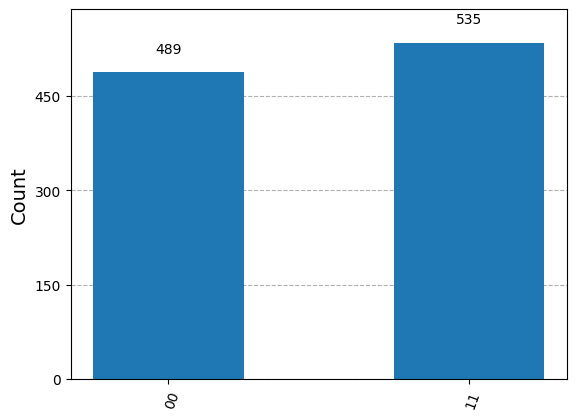

In [7]:
histogram

## Control Y
it is doing `Y gate` for the target

In [8]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cy(control_qubit=0, target_qubit=1)
qc.measure_all() # measure all qubits and send res to classical bits
res, img, histogram = execute_circuit(qc)

In [9]:
res

{'00': 516, '11': 508}

In [10]:
img

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ Y ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

So what is happening?

by default all quibits are in `|0>` so q_1 is always 0
when the H gate random decides to be `|0>` then the control bit is not in active state thus no result hence upon measureing both in the same state `|0>`
when the H decides to be `|1>` then control bit is activated and thus applies $\pi$ y axis rotate on the target which is at `|0>` thus making it `|1>` and then all in the same state `|1>`

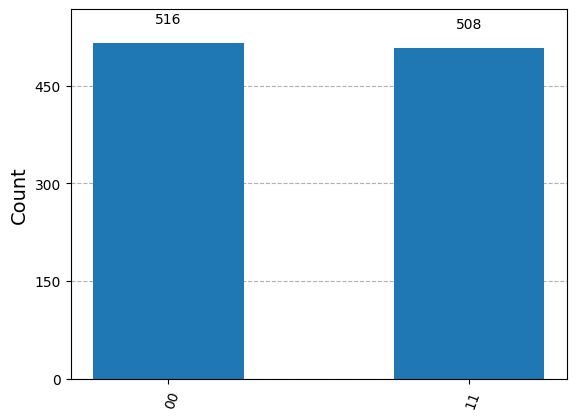

In [11]:
histogram

## Control Z

z gate as target

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cz(control_qubit=0, target_qubit=1)
qc.measure_all() # measure all qubits and send res to classical bits
res, img, histogram = execute_circuit(qc)

In [13]:
res

{'01': 510, '00': 514}

In [14]:
img

┌───┐    ░ ┌─┐   
   q_0: ┤ H ├─■──░─┤M├───
        └───┘ │  ░ └╥┘┌─┐
   q_1: ──────■──░──╫─┤M├
                 ░  ║ └╥┘
meas: 2/════════════╩══╩═
                    0  1

So what is happening?

by default all quibits are in `|0>` so q_1 is always 0
when the H gate random decides to be `|0>` then the control bit is not in active state thus no result hence upon measureing both in the same state `|0>`
when the H decides to be `|1>` then control bit is activated and thus applies $\pi$ z axis rotate on the target which is at `|0>` which is still `|0>` thus making $q_0$ = `|1>` and $q_1$ = `|0>` 

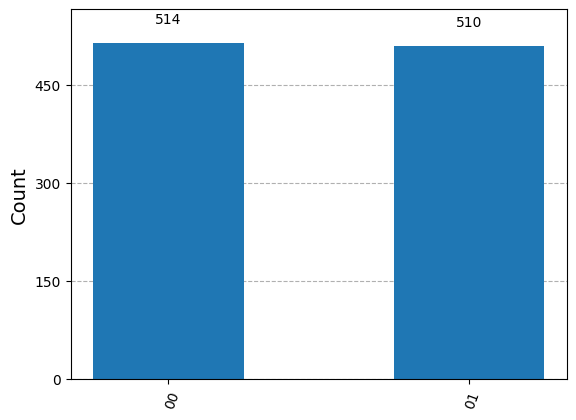

In [15]:
histogram